Please find below the Project for Supervised Learning course. This is an individual assignment. Kindly submit it before it's deadline.

Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat

Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt

Assignment Expectations/Steps -

1) Import and store the data in a data frame. (2.5 points)<br>
2) Remove the outliers from the data (5 points)<br>
3) Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)<br>
4) Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)<br>
5) Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)<br>
6) Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)<br>
7) Print the coefficients & intercepts of the linear regression model (5 points)<br>
8) Print the accuracy of the overall model (2.5 points)

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
import seaborn as sns

### 1) Importing the dataset and storing it in a dataframe

In [81]:
#can also be writen as :
#flight_data=pd.read_csv( 'http://www.stat.ufl.edu/~winner/data/airq402.dat',delim_whitespace=True,
#                            names='City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share (LPA),price'.split(','))

flight_fare=pd.read_csv('http://www.stat.ufl.edu/~winner/data/airq402.dat',sep='\s+',engine='python',
                        names='City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share (LPA),price'.split(','))

In [82]:
print(flight_fare.shape)

(1000, 11)


In [83]:
flight_fare.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share (LPA),price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [84]:
flight_fare.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average weekly passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
market share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average fare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
market share (LPA),1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


#### From the describe, we can observe the following
1) Num of records is 1000<br>
2) no col has null values

In [85]:
# checking the datatyepe
flight_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share                 1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null object
market share (LPA)           1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


#### We can observe that all the variables are already in required datatypes

#### 2) Remove the outliers from the data

In [86]:
for columns in flight_fare.columns:
    Categorical_Columns = list(flight_fare.select_dtypes(include='object'))
    flight_cat = pd.get_dummies(flight_fare[Categorical_Columns])

In [87]:
IQR25=flight_fare.quantile(0.25)
IQR75=flight_fare.quantile(0.75)
flight_ouliers = flight_fare.where((flight_fare>=IQR25) & (flight_fare<=IQR75))
flight_con=pd.concat([flight_ouliers,flight_cat],axis=1)


In [88]:
flight_con.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share (LPA),...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,NaN,NaN,NaN,NaN,424.56,NaN,70.19,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,860.0,276.84,NaN,NaN,NaN,NaN,17.23,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,852.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,606.84,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,NaN,NaN,158.13,723.0,313.04,NaN,NaN,161.36,NaN,15.34,...,0,0,0,0,0,0,0,0,1,0


In [89]:
flight_fare_mod=flight_con.drop(columns=Categorical_Columns)

In [90]:
flight_fare_mod.head()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share (LPA),price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,NaN,NaN,424.56,70.19,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,860.0,276.84,NaN,NaN,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,852.0,NaN,NaN,NaN,NaN,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,606.84,NaN,NaN,NaN,NaN,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723.0,313.04,NaN,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [91]:
flight_fare_fin=flight_fare_mod.dropna(how='any',axis=0)

In [92]:
flight_fare_fin.head()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share (LPA),price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
15,154.40,767.0,372.93,50.48,152.03,50.48,152.03,1,0,0,...,0,0,0,0,0,0,0,0,1,0
25,165.69,1180.0,284.34,47.82,164.81,25.07,159.64,1,0,0,...,0,1,0,0,0,0,0,0,0,0
112,133.04,868.0,461.41,48.73,133.15,39.81,131.63,0,0,0,...,0,1,0,0,0,0,0,0,0,0
141,144.45,946.0,537.50,56.94,143.92,26.32,134.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,134.54,737.0,722.06,51.34,135.80,42.46,131.17,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### 3) Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.
#### 4) Drop the independent variables which has less than 0.1 correlation with the dependent variable
#### 5) Create scatter Plot of Independent Variable vs Dependent Variable.

In [93]:
print('we can observe that there is no variable that has corelation less than 0.10, thus no columns are dropped')
flight_fare.corr()

we can observe that there is no variable that has corelation less than 0.10, thus no columns are dropped


,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share (LPA),price
Average Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Average weekly passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
market share,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Average fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
market share (LPA),-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
price,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


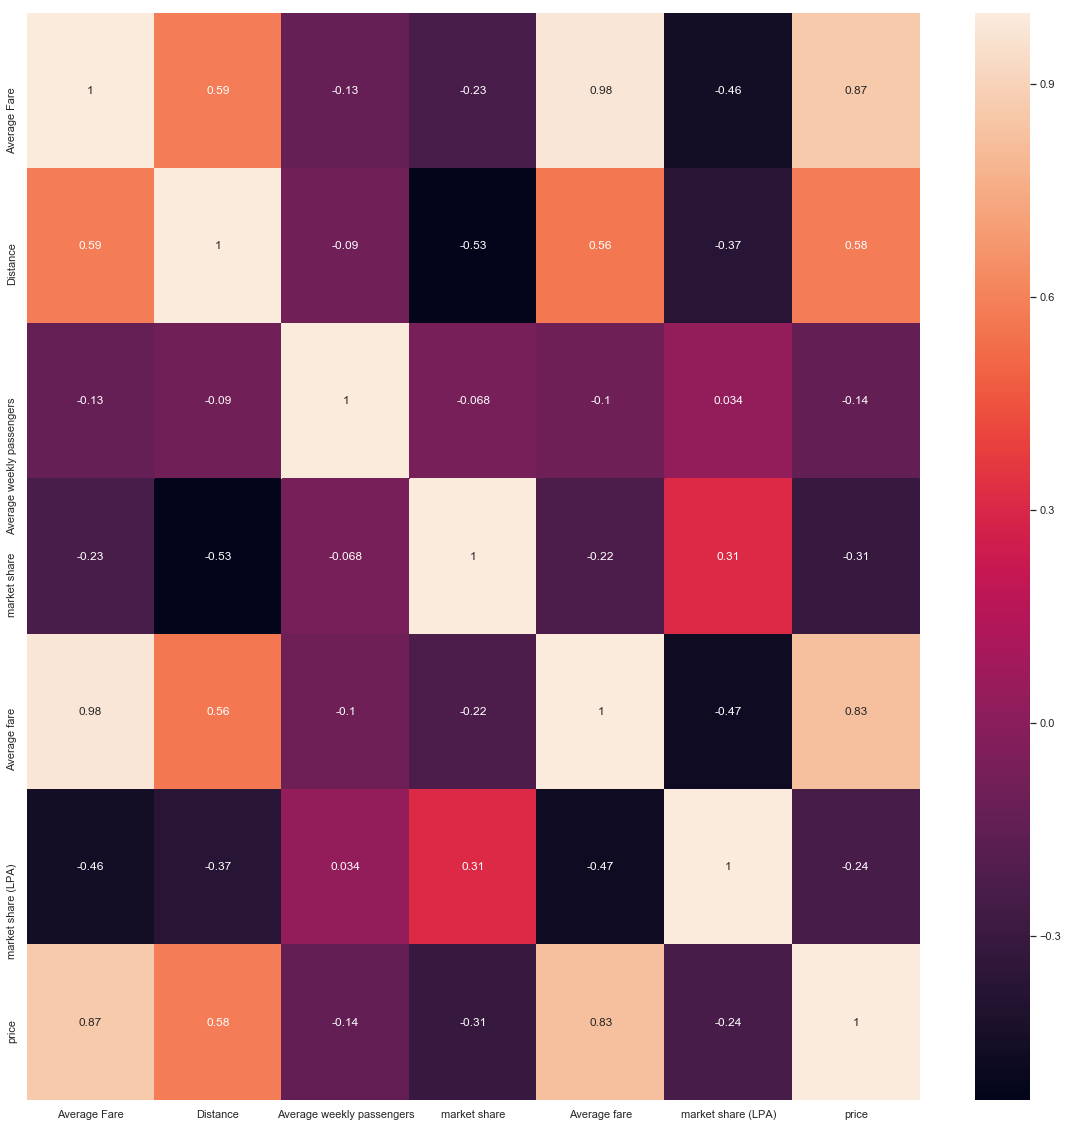

In [99]:
import seaborn as sns
sns.heatmap(flight_fare.corr(), annot=True)

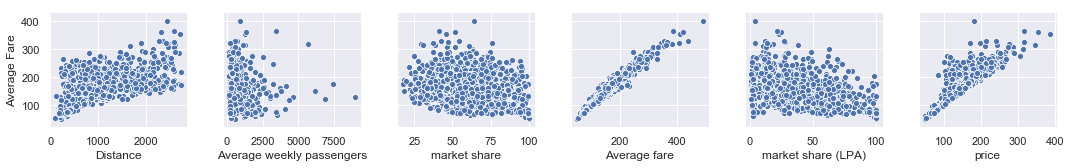

In [103]:
sns.pairplot(y_vars=['Average Fare'],x_vars=['Distance','Average weekly passengers','market share','Average fare','market share (LPA)','price'],data=flight_fare,kind='scatter')

In [100]:
X = flight_fare_fin.drop(columns=['Average Fare'])
Y = flight_fare_fin['Average Fare']

#### 6) Divide the data set into training and test data set and build a Multiple Linear Regression model. 
#### 7) Print the coefficients & intercepts of the linear regression model 
#### 8) Print the accuracy of the overall model 

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30, random_state=45)

In [148]:
from sklearn import linear_model                       #Linear Regression
regr =linear_model.LinearRegression()
pre = regr.fit(X_train,Y_train)       # regression fit for X_train, Y_train
m=regr.coef_                    #Coefficient, in this case we will have two coeff
print('Intercept:',regr.intercept_)

Intercept: 10.699701105257958


In [149]:
print('Coefficients are listed below:\n')
pd.DataFrame([m],columns=X_train.columns,index=['Variables','Coefficients']).T

Coefficients are listed below:



,Variables,Coefficients
Distance,-3.007256e-03,-3.007256e-03
Average weekly passengers,-1.758637e-03,-1.758637e-03
market share,5.272419e-02,5.272419e-02
Average fare,6.285517e-01,6.285517e-01
market share (LPA),-1.256471e-01,-1.256471e-01
price,3.411369e-01,3.411369e-01
City1_ABQ,1.353353e-01,1.353353e-01
City1_ACY,4.440892e-16,4.440892e-16
City1_ALB,-1.332268e-15,-1.332268e-15
City1_AMA,-2.664535e-15,-2.664535e-15


In [153]:
Y_pred_test = regr.predict(X_test)
Y_pred_train=regr.predict(X_train)

In [151]:
print('Accuracy score for the model (test Dataset) is:', regr.score(X_test,Y_test))
print('Accuracy score for the model (test Dataset) is:', regr.score(X_train,Y_train))

Accuracy score for the model (test Dataset) is: 0.9669909452934811
Accuracy score for the model (test Dataset) is: 1.0
